### Part 3 Dictionaries and Sets.

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


In [22]:
# Read the files from the first dataset and create columns for ENT and MUN
inegi_mx_2010 = gpd.read_file('INEGI\AGEB_urb_2010_5.shp')
inegi_yc_2020 = gpd.read_file('INEGI\\31A.shp')

In [23]:
inegi_mx_2010.head()

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry
0,LA_6052,0100100013204,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,1,"POLYGON ((2475018.434 1098724.434, 2475012.982..."
1,LA_6052,0100100013721,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,2,"POLYGON ((2475469.244 1098964.293, 2475431.454..."
2,LA_6052,0100100010657,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,3,"POLYGON ((2470787.576 1096193.647, 2470787.327..."
3,LA_6052,0100100011528,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,4,"POLYGON ((2470709.683 1097766.390, 2470705.629..."
4,LA_6052,0100100011674,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,5,"POLYGON ((2466998.954 1095069.117, 2467001.023..."


In [24]:
inegi_yc_2020.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,3100100010130,31,001,0001,0130,"POLYGON ((3776847.045 1015576.473, 3776850.565..."
1,3100100010145,31,001,0001,0145,"POLYGON ((3776745.860 1015499.562, 3776745.439..."
2,3100100010164,31,001,0001,0164,"POLYGON ((3776136.004 1014614.653, 3776022.228..."
3,3100100010126,31,001,0001,0126,"POLYGON ((3776247.740 1014594.755, 3776229.182..."
4,3100100010107,31,001,0001,0107,"POLYGON ((3776613.825 1015270.341, 3776615.972..."


In [25]:
inegi_mx_2010["ENT"] = inegi_mx_2010['CVEGEO'].str.slice(0,2)
inegi_mx_2010["MUN"] = inegi_mx_2010["CVEGEO"].str.slice(2,5)

inegi_yc_2010 = inegi_mx_2010[inegi_mx_2010['ENT'] == '31']
inegi_merida_2010 = inegi_yc_2010[inegi_yc_2010["MUN"]=="050"]

In [26]:
# Read the files from the second dataset

inegi_merida_2020 = inegi_yc_2020[inegi_yc_2020["CVE_MUN"] == "050"]

inegi_merida_2010_set = set(inegi_merida_2010['CVEGEO'])
inegi_merida_2020_set = set(inegi_merida_2020['CVEGEO'])

In [27]:
# Using sets get the intersetction, and substraction (for newagebs and disappearedagebs zones)

remains = inegi_merida_2010_set.intersection(inegi_merida_2020_set)
remains = inegi_merida_2010[inegi_merida_2010['CVEGEO'].isin(remains)]

newagebs = inegi_merida_2020_set - inegi_merida_2010_set
newagebs = inegi_merida_2020[inegi_merida_2020['CVEGEO'].isin(newagebs)]

disappearedagebs = inegi_merida_2010_set - inegi_merida_2020_set
disappearedagebs = inegi_merida_2010[inegi_merida_2010['CVEGEO'].isin(disappearedagebs)]

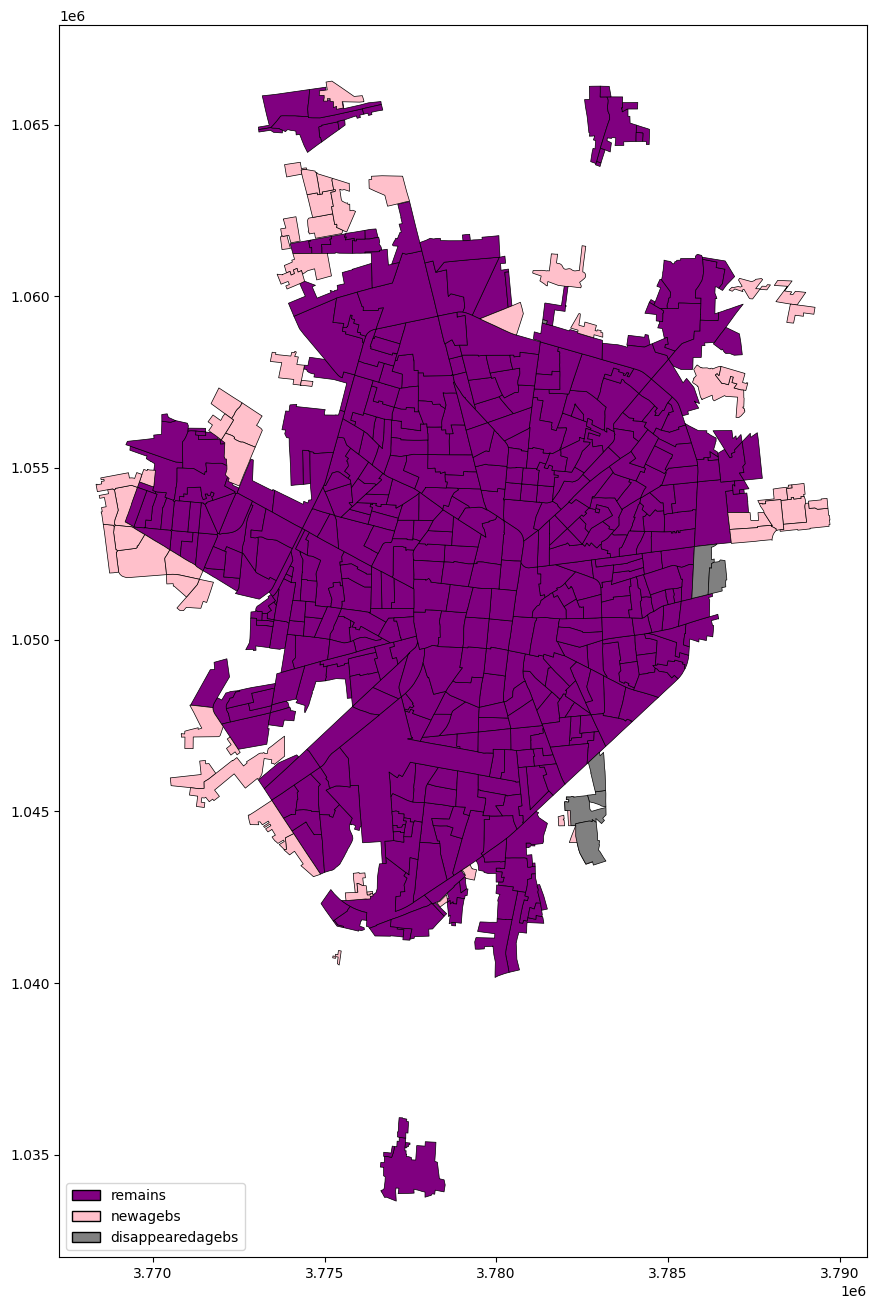

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(20, 16))

remains.plot(ax=ax, color='purple', edgecolor='black', linewidth=0.5, label='remains')
newagebs.plot(ax=ax, color='pink', edgecolor='black', linewidth=0.5, label='newagebs')
disappearedagebs.plot(ax=ax, color='gray', edgecolor='black', linewidth=0.5, label='disappearedagebs')
legend_elements = [Patch(facecolor='purple', edgecolor='black', label='remains'),
                     Patch(facecolor='pink', edgecolor='black', label='newagebs'),
                     Patch(facecolor='gray', edgecolor='black', label='disappearedagebs')]
ax.legend(handles=legend_elements, loc='lower left')

plt.show()